<a href="https://colab.research.google.com/github/ziwon-hwang/DDWU_Outlier/blob/main/outlier7%EC%A1%B0_%EC%95%88%EC%B2%A0%EC%88%98%EC%9B%8C%EB%93%9C%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 크롤링 테스트

In [1]:
import os
import sys
import urllib.request

In [2]:
import pandas as pd
import numpy as np

In [3]:
# 함수로 정의 / txt 파일로 저장

import re
import json
import math
import datetime
import requests
import urllib.request
import urllib.error
import urllib.parse
from bs4 import BeautifulSoup

# 크롤링 실습

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 불필요한 내용 제거

In [8]:
data=pd.read_csv("/content/drive/MyDrive/outlier/안철수.csv")
#data=data['comment']
data

,tweet,date,retweets_count,link
0,현 정부용어사전 55 2012년 20대 2010년에 중학교를 다닌 사람 용례 서병수...,2021-11-22,0,https://twitter.com/MB_DIC/status/146277899140...
1,escrimeurk 왜 부정적으로 봐요 국민들한테 이익이되는 일에는 좌 우를 따질...,2021-11-22,0,https://twitter.com/sbwlffosem0930/status/1462...
2,illi1ilIIll1i 예전 정의당 통진당애들이 저런소리 많이했죠 안철수 지지자들도,2021-11-22,0,https://twitter.com/onlymoon111/status/1462778...
3,hibiscus0919 맞네요,2021-11-22,0,https://twitter.com/sbwlffosem0930/status/1462...
4,윤석열은 아니죠 반사적우로 이야기하고 아차 싶어서 이재명도 별로고 영 찍을 사람 없...,2021-11-22,0,https://twitter.com/wannabehumann/status/14627...
...,...,...,...,...
4400,joelle10021 몇일전 2012년 양보도 잘못한 선택였다고 평소와 다른 소회...,2021-11-14,1,https://twitter.com/sanyacho211/status/1459540...
4401,국내외 상황도 안철수의 시간을 말하고 있습니다 과학기술 패권전쟁에 대한 식견 다자정...,2021-11-14,16,https://twitter.com/hongsugchoi/status/1459539...
4402,안철수 바이오산업 육성하여 G5 경제강국 갑시다 준비된미래 시대교체 2XS54pa...,2021-11-14,0,https://twitter.com/vision4creation/status/145...
4403,자 드디어 이 윤 둘다 싫은 제1지대가 50 60 까지 급등 이제부터 슬슬 안철수의...,2021-11-14,24,https://twitter.com/ahngong/status/14595373070...


In [9]:
# 한글과 띄어쓰기만 추출
import re
result=[]
hangul = re.compile('[^ ㄱ-ㅣ가-힣+]')
#hangul = re.compile('[^ \u3131-\u3163\uac00-\ud7a3]+')

for i in range(len(data)):
  result.append(hangul.sub('', data['tweet'][i])) 
result

['현 정부용어사전  년 대 년에 중학교를 다닌 사람 용례 서병수 대 안철수 지지 교과서가 큰 영향 중학교 기술교과서에 안철수가 실린건 년',
 '  왜 부정적으로 봐요 국민들한테 이익이되는 일에는 좌 우를 따질 이유도 없고 안철수는 실용주의자지 보수도 아닌데요 참 이상하네요',
 '  예전 정의당 통진당애들이 저런소리 많이했죠 안철수 지지자들도 ',
 '  맞네요',
 '윤석열은 아니죠 반사적우로 이야기하고 아차 싶어서 이재명도 별로고 영 찍을 사람 없네요 이랬는데 그럼 안철수 이러셨음 ',
 '  불법 이잖아요 그래서 여론조사 업체들 과태료 물고 저 여론조사는 솔직히 막산이한테 굉장히 우호적인 여론조사 기관에서 한거잖아요 실제 저 정도는 아니고 윤부적이  정도는 앞서고 있을거에요',
 ' 선을 넘다대한민국 혁신 논쟁  북콘서트 는   의 약자로 청년들의 꿈을 함께 공유하고 대한민국 미래를 함께 논의하는 청년들과의 소통장을 의미함 국민상자 국민의당 안철수  ',
 '혹시 혹은 만약에 김한길 꼰대가 안철수 꼬셔서 대선포기 하고 윤석열 꼬붕으로 가라고 하지 않을까 그냥 그렇다고 ',
 '안철수 겨울 철새로 돌아왓다 매 한마디 구구절절 천박함이 묻어난다 ',
 '  공백이는 안철수',
 '심상정 안철수에 빠른 시일 내 조건 없이 만나자 양당체제 종식 기자회견서 안철수 김동연에 회동 제안 노회찬 없는 정의당 참 안쓰럽다 페미들만 잔뜩 모아 놓은 이상한 모습에 사욕 가득한 심상정 ',
 '   미치겠네요 표정이 웃겨서',
 '남자 박근혜 호 남박근혜 호 안철수도 동시다발로 널뛴다나 ',
 '심상정이 안철수의 제안을 긍정적으로 수용한 듯한데 트위터 좌파 의 일부의 부정적 반응을 보니 역시',
 '외부인사 추천 허경영 안철수 심상정',
 ' 생각했던 거보나 윤석열이 훨씬 괜찮아 보인다 정말 기대 이상이다 인물이긴 인물이네 내가 안철수와 윤석열에게 느끼는 비슷한 느낌 가장 큰 호감은 겉치레에 신경을 덜 쓰고 자기 분야 최정점에 올랐다는 건데 이게 한국 사회에 제일 필요한 

In [10]:
for k in range(len(result)):
  result[k]=result[k].replace('\n',' ')
  result[k]=result[k].replace('\t',' ')

# 불필요한 내용 제거
   

In [11]:
#result_split = result.split('포스팅 내용')
#result_split[1]
#result_split
result[0]

'현 정부용어사전  년 대 년에 중학교를 다닌 사람 용례 서병수 대 안철수 지지 교과서가 큰 영향 중학교 기술교과서에 안철수가 실린건 년'

In [12]:
file = open('/content/drive/MyDrive/Colab Notebooks/NEWS_split_crawling_data.txt',"w", encoding='utf-8')
file.write(str(result))
file.close()

# 형태소 분석

In [13]:
data_split = open('/content/drive/MyDrive/Colab Notebooks/NEWS_split_crawling_data.txt', 'r', encoding='utf-8').read()
data_split = [[data_split,1]]
print(data_split)

[["['현 정부용어사전  년 대 년에 중학교를 다닌 사람 용례 서병수 대 안철수 지지 교과서가 큰 영향 중학교 기술교과서에 안철수가 실린건 년', '  왜 부정적으로 봐요 국민들한테 이익이되는 일에는 좌 우를 따질 이유도 없고 안철수는 실용주의자지 보수도 아닌데요 참 이상하네요', '  예전 정의당 통진당애들이 저런소리 많이했죠 안철수 지지자들도 ', '  맞네요', '윤석열은 아니죠 반사적우로 이야기하고 아차 싶어서 이재명도 별로고 영 찍을 사람 없네요 이랬는데 그럼 안철수 이러셨음 ', '  불법 이잖아요 그래서 여론조사 업체들 과태료 물고 저 여론조사는 솔직히 막산이한테 굉장히 우호적인 여론조사 기관에서 한거잖아요 실제 저 정도는 아니고 윤부적이  정도는 앞서고 있을거에요', ' 선을 넘다대한민국 혁신 논쟁  북콘서트 는   의 약자로 청년들의 꿈을 함께 공유하고 대한민국 미래를 함께 논의하는 청년들과의 소통장을 의미함 국민상자 국민의당 안철수  ', '혹시 혹은 만약에 김한길 꼰대가 안철수 꼬셔서 대선포기 하고 윤석열 꼬붕으로 가라고 하지 않을까 그냥 그렇다고 ', '안철수 겨울 철새로 돌아왓다 매 한마디 구구절절 천박함이 묻어난다 ', '  공백이는 안철수', '심상정 안철수에 빠른 시일 내 조건 없이 만나자 양당체제 종식 기자회견서 안철수 김동연에 회동 제안 노회찬 없는 정의당 참 안쓰럽다 페미들만 잔뜩 모아 놓은 이상한 모습에 사욕 가득한 심상정 ', '   미치겠네요 표정이 웃겨서', '남자 박근혜 호 남박근혜 호 안철수도 동시다발로 널뛴다나 ', '심상정이 안철수의 제안을 긍정적으로 수용한 듯한데 트위터 좌파 의 일부의 부정적 반응을 보니 역시', '외부인사 추천 허경영 안철수 심상정', ' 생각했던 거보나 윤석열이 훨씬 괜찮아 보인다 정말 기대 이상이다 인물이긴 인물이네 내가 안철수와 윤석열에게 느끼는 비슷한 느낌 가장 큰 호감은 겉치레에 신경을 덜 쓰고 자기 분야 최정점에 올랐다는 건데 이게 한국 사회에 제일 필요한 부분으로 보인다 무엇보

In [14]:
pip install konlpy

     |████████████████████████████████| 19.4 MB 34.0 MB/s 
     |████████████████████████████████| 448 kB 49.1 MB/s 
     |████████████████████████████████| 86 kB 6.4 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [15]:
from konlpy.tag import Okt

okt = Okt()

def tokenize(doc):
    return [t for t in okt.pos(doc, norm=True, stem=True)]      # norm은 정규화, stem은 근어로 표시

tokenize_docs = [(tokenize(row[0]), row[1]) for row in data_split]

with open('/content/drive/MyDrive/Colab Notebooks/tokenized_data', 'w', encoding="utf-8") as make_file:     # JSON 파일로 저장
    json.dump(tokenize_docs, make_file, ensure_ascii=False, indent="\t")
tokenize_docs[0]

([("['", 'Punctuation'),
  ('현', 'Noun'),
  ('정부', 'Noun'),
  ('용어사전', 'Noun'),
  ('년', 'Noun'),
  ('대다', 'Verb'),
  ('년', 'Noun'),
  ('에', 'Josa'),
  ('중학교', 'Noun'),
  ('를', 'Josa'),
  ('다니다', 'Verb'),
  ('사람', 'Noun'),
  ('용례', 'Noun'),
  ('서병수', 'Noun'),
  ('대다', 'Verb'),
  ('안철수', 'Noun'),
  ('지지', 'Noun'),
  ('교과서', 'Noun'),
  ('가', 'Josa'),
  ('크다', 'Verb'),
  ('영향', 'Noun'),
  ('중학교', 'Noun'),
  ('기술', 'Noun'),
  ('교과서', 'Noun'),
  ('에', 'Josa'),
  ('안철수', 'Noun'),
  ('가', 'Josa'),
  ('실리다', 'Verb'),
  ('년', 'Noun'),
  ("',", 'Punctuation'),
  ("'", 'Punctuation'),
  ('왜', 'Noun'),
  ('부정', 'Noun'),
  ('적', 'Suffix'),
  ('으로', 'Josa'),
  ('보다', 'Verb'),
  ('국민', 'Noun'),
  ('들', 'Suffix'),
  ('한테', 'Josa'),
  ('이익', 'Noun'),
  ('이', 'Josa'),
  ('되다', 'Verb'),
  ('일', 'Noun'),
  ('에는', 'Josa'),
  ('좌', 'Noun'),
  ('우', 'Noun'),
  ('를', 'Josa'),
  ('따지다', 'Verb'),
  ('이유', 'Noun'),
  ('도', 'Josa'),
  ('없다', 'Adjective'),
  ('안철수', 'Noun'),
  ('는', 'Josa'),
  ('실용주의', 'Noun'),
  (

# 워드클라우드

In [16]:
# 빈도수 세기

from collections import Counter
counter = Counter(tokenize_docs[0][0])
count_words = sorted(counter.items(), key=lambda x:-x[1])
count_words

[(('안철수', 'Noun'), 4809),
 (("',", 'Punctuation'), 4404),
 (("'", 'Punctuation'), 4404),
 (('하다', 'Verb'), 3963),
 (('이', 'Josa'), 2177),
 (('을', 'Josa'), 1790),
 (('가', 'Josa'), 1657),
 (('의', 'Josa'), 1643),
 (('에', 'Josa'), 1531),
 (('은', 'Josa'), 1371),
 (('들', 'Suffix'), 1233),
 (('는', 'Josa'), 1198),
 (('를', 'Josa'), 1095),
 (('후보', 'Noun'), 1068),
 (('있다', 'Adjective'), 1043),
 (('되다', 'Verb'), 943),
 (('도', 'Josa'), 866),
 (('윤석열', 'Noun'), 852),
 (('이재명', 'Noun'), 764),
 (('으로', 'Josa'), 719),
 (('뉴스', 'Noun'), 692),
 (('것', 'Noun'), 681),
 (('없다', 'Adjective'), 619),
 (('과', 'Josa'), 563),
 (('대선', 'Noun'), 518),
 (('로', 'Josa'), 517),
 (('대통령', 'Noun'), 512),
 (('국민', 'Noun'), 478),
 (('보다', 'Verb'), 472),
 (('에서', 'Josa'), 452),
 (('적', 'Suffix'), 448),
 (('출처', 'Noun'), 440),
 (('심상정', 'Noun'), 437),
 (('청년', 'Noun'), 431),
 (('사람', 'Noun'), 419),
 (('아니다', 'Adjective'), 419),
 (('한', 'Josa'), 418),
 (('공약', 'Noun'), 402),
 (('네이버', 'Noun'), 355),
 (('정치', 'Noun'), 338),
 

In [17]:
# 명사만 추출
noun_count = {x[0][0]:x[1] for x in count_words if x[0][1]=='Noun' and len(x[0][0])>=2 and '동덕' not in x[0][0]}
noun_count

{'안철수': 4809,
 '후보': 1068,
 '윤석열': 852,
 '이재명': 764,
 '뉴스': 692,
 '대선': 518,
 '대통령': 512,
 '국민': 478,
 '출처': 440,
 '심상정': 437,
 '청년': 431,
 '사람': 419,
 '공약': 402,
 '네이버': 355,
 '정치': 338,
 '국민의당': 324,
 '생각': 286,
 '다음': 276,
 '민주당': 267,
 '미래': 240,
 '교체': 230,
 '김동연': 227,
 '대표': 223,
 '정권': 216,
 '우리': 214,
 '특검': 203,
 '지지율': 202,
 '정책': 201,
 '대한민국': 189,
 '버스': 189,
 '지지': 182,
 '지금': 175,
 '시대': 175,
 '일화': 168,
 '지지자': 162,
 '발표': 162,
 '나라': 157,
 '이준석': 148,
 '문재인': 147,
 '기회': 145,
 '준비': 133,
 '메타': 132,
 '이번': 126,
 '선거': 124,
 '김종인': 123,
 '국힘': 109,
 '문화': 109,
 '때문': 106,
 '진짜': 103,
 '당선': 102,
 '과학기술': 102,
 '폐지': 100,
 '이제': 95,
 '정치인': 95,
 '하나': 94,
 '예술의전당': 94,
 '시간': 93,
 '선택': 93,
 '인간': 91,
 '소리': 90,
 '정도': 90,
 '한국': 90,
 '이유': 89,
 '세계': 89,
 '국가': 89,
 '가장': 88,
 '홍준표': 88,
 '자기': 87,
 '다른': 87,
 '수시': 87,
 '김한길': 85,
 '오늘': 85,
 '소통': 84,
 '문제': 84,
 '정의당': 82,
 '제안': 82,
 '그냥': 81,
 '지대': 80,
 '경제': 80,
 '위해': 79,
 '여론조사': 77,
 '시작': 77,
 '완주': 76,
 '대한'

In [18]:
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

# 폰트설정
!apt-get update -qq
!apt-get install fonts-nanum* -qq
import matplotlib.font_manager as fm
fm._rebuild()
for fontInfo in fm.fontManager.ttflist:
    if 'Nanum' in fontInfo.name:
        print(fontInfo.name+" = " + fontInfo.fname)

Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothicBold.

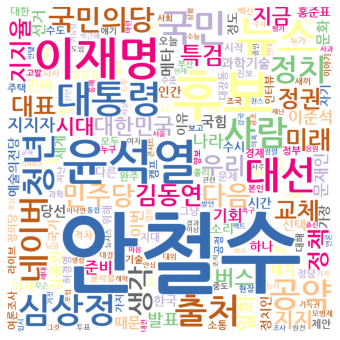

In [19]:
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'   # 원하는 폰트 지정

wordcloud = WordCloud(
    max_words=200, #최대 수용 단어 갯수
    background_color='white', #배경색상
    font_path=font_path,
    width = 800, #넓이
    height = 800, #길이
    colormap='Accent_r')
    
wordcloud.generate_from_frequencies(dict(noun_count))

fig =  plt.figure(figsize=(6,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
fig.savefig('/content/drive/MyDrive/Colab Notebooks/word_cloud.jpg')